# How we will proceed with learning NN using TensorFlow

##   1. Multiple Perceptron (the simplest NN)
      
    * models
      * sequential
      * functional

    * methods of a sequential model
      * model.summary
      * model.compile
      * model.fit
      * history
      * model.evaluate
      * model.predict
      
    * example classification mnist digits
      * from CSV, TXT, 
      * importing data from Tensorflow build-in datasets
      * optimizing parameters
      
    * example regression car CO2 emission 
      * from the tensorflow dataset
      
      
      
##   2. Convolutional Neuron Network CNN
    * Convolution
       * theory
    * example CIFAR-100
    * example cats and dogs
      * import images using "flow_from_directory"
      * augmentation
      * Regularization and Dropout

##   3. Saving and loading models 
    * parameters and architecture of our own trained models
    * loading pretrained models

# Perceptron - introduced in earlier class 
* single unit of operation of Neural Network

<table><tr>
<td> <img src="imgs/perceptron.png" width="400" /> </td>
</tr></table>

# Multi Layer Perceptron (MLP) - Neural Network 
(the simplest NN)
Multi-layer perception is also known as MLP. It is fully connected dense layers, which transform any input dimension to the desired dimension. A multi-layer perception is a neural network that has multiple layers. To create a neural network we combine neurons together so that the outputs of some neurons are inputs of other neurons.


MPL can have any number of hidden layers and each hidden layer can have any number of nodes. A schematic diagram of a Multi-Layer Perceptron (MLP) is depicted below.

<table><tr>
<td> <img src="imgs/MLP.png" width="400" /> </td>
</tr></table>

# Principle elements of building Neural Network using TensorFlow:


<table><tr>
<td> <img src="imgs/TF_workflow.png" width="1000" /> </td>
</tr></table> 

## Step 1 import and prepare the data

  * from CSV/TXT files data 
     * import using pandas 
     * clean if necessary
     * convert to numpy
     * X_train,y_train X_test,y_test (using scikit-learn )
     
  * from dictionary 
     * X_train,y_train X_test,y_test (using scikit-learn )

  * from Tensorflow 
     * (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
  
  * loading images
     * organize images in directories
     * use Tensorflow flow_from_directory
        * train_generator = train_datagen.flow_from_directory()

     
#### Notes on preparing data:

In order to train a deep neural network model with
Keras, the input data sets needs to be cleaned,
balanced, transformed, scaled, and splitted.

* convert the categorical variables using one-hot encoded variables or numerical variables
* Extract the X (variables) and y (targets) values for the training and testing datasets.
* Scale/normalize the variables.
* Shuffle and split the dataset into training and testing datasets    


## Step 2-4 create model and execute methods on it 
  * create sequential model
  * model.compile
  * model.fit
  * model.evaluate
  * model.predict

## MODEL (we already know the principles of preparing data)

### * sequential 
  * Here we create the model layer-by-layer. It is very simple and easy to use. But branching of layers is not allowed. Also, you can’t have multiple inputs or outputs.
  
  * A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
  
<table><tr>
<td> <img src="imgs/model_sequential.png" width="400" /> </td>
</tr></table>

  * A Sequential model is not appropriate when:
    - Your model has multiple inputs or multiple outputs
    - Any of your layers has multiple inputs or multiple outputs
    - You need to do layer sharing
    - You want non-linear topology (e.g. a residual connection, a multi-branch model)


### * functional
  * It is more flexible than the sequential API. It is more powerful than the sequential API in the sense branching or sharing of layers is allowed here. And also it can have multiple inputs and outputs.
  
<table><tr>
<td> <img src="imgs/model_functional.png" width="400" /> </td>
</tr></table>

  * its slightly more complex so we will focus on Sequential

## Sequential model for simple MLP neural network
* InputLayer, Dense, Flatten

* (for more information read documentation!!!)

### InputLayer
https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer

syntax with full parameter (hardly used all)


`tf.keras.layers.InputLayer(
    input_shape=None, batch_size=None, dtype=None, input_tensor=None, sparse=None,
    name=None, ragged=None, type_spec=None, **kwargs
)`


* InputLayer most typical parameters are two:
* `tf.keras.layers.InputLayer(input_shape=tuple, name='string')`
   * name is optional
   * the parameter "input_shape" is a tuple
     * can be given from a variable passed by a function parameter
     * how to get the proper dimensions: X_train[0].shape
     * why X_train[0].shape


In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('mnist_test.csv')
data = data.to_numpy()
X_data = data[:, 1:]
y_data = data[:, 0]

from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test)=train_test_split(X_data,y_data,test_size=0.1, random_state=3)

In [2]:
print('shape of the train dataset:',X_train.shape)

shape of the train dataset: (9000, 784)


In [3]:
print('total number of samples:',X_train.shape[0])

total number of samples: 9000


In [4]:
print('shape of a single dataset:', X_train[0].shape)

shape of a single dataset: (784,)


* so the InputShape is the shape of the SINGLE element of the dataset
* and the training will load (in the 'loop') 9000 dataset each having the shape of vector having 784 elements 
* the model.fit() training function does not care how many samples are to train
  it cares what is the size of the sinle element from dataset

### Dense layer
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

* Dense is a standard neural network layer

`tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,`
   

   * in the simplest case `dense` accepts number of neurons, the activation function and label 
    `tf.keras.layers.Dense(units=integer, activation='string')`
   * later on we will pass other parameters (like regularization)
   * dense will be also the output layer
   * optional `name`

### Flatten layer
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

* Flatten()  
   * takes usually no parameters
   * the digits data imported from CSV file are vectors - flat data already
   * if the data come as images 2D/3D arrays they must be flattened after the InputLayer and before the first hidden layer

## Example 1 on the mnist_test.csv
* loading the tensorflow libraries
* creating an architecture of a sequential model

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import InputLayer, Dense, Flatten

In [8]:
# optionally setting the seed fixed 
tf.random.set_seed(1234)
# this is important if you want to compare performance 
# using different parameters
# tf.random.set_seed() will make sure that the model have the same 
# initial conditions


In [9]:
model = Sequential([
                  InputLayer(input_shape=(784,)),
#                  Flatten(),
                  Dense(units=100,activation='relu',name='layer_1'),
                  Dense(units=10,activation='softmax',name='output_layer')
                 ])

### look at the syntax:
  * object `model` is created using sequential model
  * round brackets + square brackets
  * each layer is specified after comma
  * each layer is in the new line - for clarity
### layers (here three)

  * input layer
    * here the input_shape is specified manually
    
    
  * dense hidden 
    * units=number of neurons in this layer can be arbitrary (output of this layer)
    * activation function (here is relu - most popular)
    * name for identification
    * we can put many other hidden layers with activation function
    
    
  * dense output layer
    * units=number of classes in the classification problem
    * here units =10 because we have 10 different digits
    * the activation function for the output layer is softmax (see reference for explanation and for other options)
    * softmax will return the probability of a digit to be 0,1,2,3,4,5,6,7,8,9

* reminder of activation funtions:

http://localhost:8888/notebooks/MEGASyncWork/Universidad_de_Antioquia/CARGAS/2021-2/Electiva_Modelado_de_datos_con_redes_neuronales/NeuralNetworksRsouzaCourse/Notebooks/extras/classes_MH/class_13/how_NN_works.ipynb

#### nice visualization
https://www.cs.ryerson.ca/~aharley/vis/conv/

## The right way to create model is to use function!

In [10]:
def get_model(input_shape):
    model=Sequential([
                  InputLayer(input_shape=input_shape),
                  Dense(units=16,activation='relu',name='layer_hidden'),
                  Dense(units=10,activation='softmax',name='output_layer')
                 ])
    return model

In [11]:
model = get_model(X_train[0].shape)

##  Summary

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_hidden (Dense)         (None, 16)                12560     
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


# for the MLP network the number of parameters can be calculated using following formula:
num_params = (input_size + bias) * output_size

* input_size: number of features, here number of pixels is 784
* bias = 1
* we must calculate `num_params` of EACH layer using input and output of that layer and sum them up
* `num_params` ~ number of connections (between each layers)


In [13]:
layer1 = (784 + 1) * 16
layer2 = (16 + 1) * 10
print('number of trainable parameters in the first layer:',layer1)
print('number of trainable parameters in the second layer:',layer2)
print('total number of trainable parameters (weights):',layer1+layer2)

number of trainable parameters in the first layer: 12560
number of trainable parameters in the second layer: 170
total number of trainable parameters (weights): 12730


<table><tr>
<td> <img src="imgs/number_of_parameters.png" width="200" /> </td>
</tr></table>

The bottom line is:

    * The Sequential model allows us to create models layer-by-layer as we need in a multi-layer perceptron and is limited to single-input, single-output stacks of layers.
    * Activation is for using the sigmoid activation function.
    * The first two Dense layers are used to make a fully connected model and are the hidden layers.
    * The last Dense layer is the output layer which contains 10 neurons that decide which category the image belongs to.
    * Here we didnt use flatten 
      (Flatten flattens the input provided without affecting the batch size. For example, If inputs are shaped (batch_size,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch_size, 1).)

### Compile the model with given parameters
* optimizer (adam,sgd)
* loss function, for mnist try: 'sparse_categorical_crossentropy'
* metrics (most common is accuracy) (how to measure the performance of the NN)

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Optimizers:

optimizers = [
    'Adadelta',
    'Adagrad',
    'Adam',
    'Adamax',
    'Nadam',
    'RMSprop',
    'SGD'
]

Most popular are:

* SGD - stochastic gradient descent
  * The king of all the optimizers and it’s very fast, robust, and flexible. 
  * Is one of the simplest optimization algorithms. It uses just one static learning rate for all parameters during the entire training phase.

`tf.kears.optimizers.SGD(learning_rate = 0.01,
                                momentum=0.0, 
                                nesterov=False, 
                                name='SGD', 
                                **kwargs)`
* RMSprop 
  * use momentum for updating. This can be compared to rolling a ball (state of the neural network) down a hill (the graph of a cost function). The longer the ball moves in a certain direction, the faster it goes, giving the ball higher momentum. The momentum of the ball is useful because it allows the network to ‘roll over’ local minima — not getting stuck in them.


`tf.keras.optimizers.RMSprop(learning_rate=0.001, 
                                    rho=0.9, 
                                    momentum=0.0, 
                                    epsilon=1e-07, 
                                    centered=False,
                                    name='RMSprop', 
                                    **kwargs)`
                                    
* Adam - AdAptive Moment estimation,
  * In the ball rolling down the hill analogy, Adam would be a weighty ball. 
  * also uses past learning rates like AdaGrad and RMSProp do. However, Adam doesn’t stop there—it also uses past gradients to speed up learning. When Adam moves in a certain direction, it does so with a ‘great force’— it’s not suddenly going to stop and turn around.

`tf.keras.optimizers.Adam(learning_rate=0.001, 
                                 beta_1=0.9, 
                                 beta_2=0.999, 
                                 epsilon=1e-07, 
                                 amsgrad=False,
                                 name='Adam', 
                                 **kwargs)`
                                 
* Each optimizer performs differently at each dataset
  * compare them with mnist (dont forget to fix the initialization to be able to objectvely compare the optimizers)
  * comparison: https://heartbeat.comet.ml/an-empirical-comparison-of-optimizers-for-machine-learning-models-b86f29957050

## loss function for classification problem:

1. Binary Cross-Entropy Loss:

Binary cross-entropy is used to compute the cross-entropy between the true labels and predicted outputs. It’s used when two-class problems arise like cat and dog classification [1 or 0].

In [15]:
#y_train = [[0.,1.],
#          [0.,0.]]

#y_pred = [[0.5,0.4],
#         [0.6,0.3]]

2. Categorical Crossentropy Loss:
The Categorical crossentropy loss function is used to compute loss between true labels and predicted labels.

It’s mainly used for ***multiclass classification*** problems. For example Image classification of animal-like cat, dog, elephant, horse, and human.

In [16]:
# y_train = [[0, 1, 0, 0],
#            [0, 0, 1, 0],

#y_pred = [[0.05, 0.95, 0.56], 
#          [0.1, 0.4, 0.1]]

3. Sparse Categorical Crossentropy Loss:

It is also used in ***multiclass classification*** problem. similarly to categorical crossentropy. But there is one minor difference, between categorical crossentropy and sparse categorical crossentropy that’s in sparse categorical cross-entropy labels are expected to be provided in integers.

In [17]:
# y_train = [1, 
##             2, 
 #            3,
 #            7]

### Multiclass classification:
    * ***one-hot*** encoding  : use loss='categorical_crossentropy'
    * numerical encoding: use loss='sparse_categorical_crossentropy'

<table><tr>
<td> <img src="imgs/one_hot_vs_numerical.png" width="200" /> </td>
</tr></table>

### We can convert numerical encoding to one-hot encoding, for example using numpy

In [18]:
a = np.array([1, 0, 3])
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1

In [19]:
a

array([1, 0, 3])

In [20]:
b

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

## For mnist would be:

In [21]:
y_train_one_hot = np.zeros((y_train.size, y_train.max()+1))
y_train_one_hot[np.arange(y_train.size),y_train] = 1

In [22]:
y_train

array([1, 4, 6, ..., 7, 6, 6])

In [23]:
y_train_one_hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
print(a)

[1 0 3]


In [25]:
print(b)

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [26]:
print(y_train)

[1 4 6 ... 7 6 6]


### We can convert numerical encoding to one-hot encoding, for example using TensorFlow

In [27]:
from keras.utils.np_utils import to_categorical   
y_train_tf_one_hot = to_categorical(y_train, num_classes=10)

In [28]:
y_train_tf_one_hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Tweaking extra parameters in the model.compile
we can compile the model in a simple way and in an advance way (setting more parameters like learning rate)

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Finally for compiling also use functions

In [31]:
def compile_model(model):
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
compile_model(model)

### Fitting (training) the model with given parameters
* accepts X_train,y_train 
* can automatically split data into evaluation subset using `validation_split option`
* epochs - number of passes through the data (remember gradient descent)
* batch_size like a size of a package (default is 32)
* verbose - to visualize the progress
  * verbose=1 - long output with progress
  * verbose=2 - short output without progress 
  * verbose=False  - no output

In [33]:
epochs=10
myhistory=model.fit(X_train, y_train,  epochs=epochs, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/10
254/254 - 1s - loss: 5.2123 - accuracy: 0.2195 - val_loss: 2.0591 - val_accuracy: 0.2478
Epoch 2/10
254/254 - 0s - loss: 1.8810 - accuracy: 0.3632 - val_loss: 1.7689 - val_accuracy: 0.4278
Epoch 3/10
254/254 - 0s - loss: 1.5802 - accuracy: 0.4662 - val_loss: 1.5552 - val_accuracy: 0.4911
Epoch 4/10
254/254 - 0s - loss: 1.3651 - accuracy: 0.5289 - val_loss: 1.3724 - val_accuracy: 0.5722
Epoch 5/10
254/254 - 0s - loss: 1.2774 - accuracy: 0.5591 - val_loss: 1.2186 - val_accuracy: 0.5833
Epoch 6/10
254/254 - 0s - loss: 1.1492 - accuracy: 0.6048 - val_loss: 1.1827 - val_accuracy: 0.6567
Epoch 7/10
254/254 - 0s - loss: 1.0202 - accuracy: 0.6486 - val_loss: 1.3418 - val_accuracy: 0.6711
Epoch 8/10
254/254 - 0s - loss: 0.9514 - accuracy: 0.6726 - val_loss: 0.9486 - val_accuracy: 0.7200
Epoch 9/10
254/254 - 0s - loss: 0.8596 - accuracy: 0.7089 - val_loss: 1.0043 - val_accuracy: 0.7400
Epoch 10/10
254/254 - 0s - loss: 0.8101 - accuracy: 0.7309 - val_loss: 1.1607 - val_accuracy: 0.7744

# History is to visualize the process of the learning (is a dictionary )
* we give the object arbitrary name
* we can check the keys myhistory.history.keys()

In [34]:
print(myhistory.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


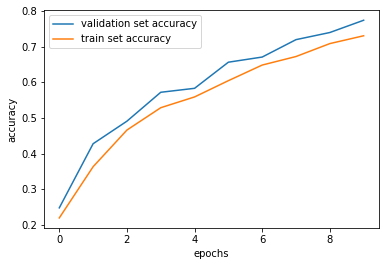

In [35]:
import matplotlib.pyplot as plt
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

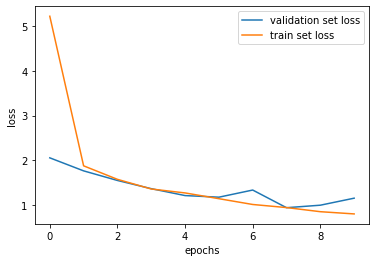

In [36]:
import matplotlib.pyplot as plt
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_loss'],label='validation set loss')
ax.plot(xvals, myhistory.history['loss'],label='train set loss')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.legend()


#### from the graphs above one can conclude at least two things:
* both validation and training show similar trend, so probably no overfitting 
* both validation and training sets havent reached minimimum so I can increase number of epochs 

# Evaluate the model
* model.evaluate will return the loss and accuracy in percentage
* we can also evaluate the model before training

In [37]:
loss, accuracy=model.evaluate(X_test, y_test)
print(accuracy)

32/32 [==============================] - 0s 1ms/step - loss: 1.1071 - accuracy: 0.7630
0.7630000114440918


In [38]:
accuracy

0.7630000114440918

## We can also compare it with untrained model

In [39]:
untrained_model=get_model(X_train[0].shape)

In [40]:
compile_model(untrained_model)

In [41]:
loss_untrained,accuracy_untrained=untrained_model.evaluate(X_train, y_train)
print(accuracy_untrained)

282/282 [==============================] - 0s 922us/step - loss: 113.3432 - accuracy: 0.1433
0.1433333307504654


## Predict (check the model state of training)
`pred = model.predict()`
* remember the size of the sample that you want to predict must have the same dimension like trainging data
* accepts slices of data. Use X_test for prediction

Imagine you want to predict single digit:
Should you use:
    
* X_test[0]
* X_test[0:1]

???

In [42]:
print(X_train.shape)

(9000, 784)


In [43]:
print(X_test.shape)

(1000, 784)


In [44]:
print(X_test[0].shape) # this will prduce error

(784,)


In [45]:
print(X_test[0:1].shape) # correct has same dimension (only different number of smaples)

(1, 784)


In [46]:
pred = model.predict(X_test[100:101,:])
print(pred)

[[0.05220655 0.03153115 0.04760565 0.13938017 0.08168406 0.23006758
  0.04006599 0.02865542 0.248041   0.10076244]]


In [47]:
y_test[100:101]

array([5])

In [48]:
np.argmax(pred)

8

# MNIST using Tensorflow dataset

https://www.cs.ryerson.ca/~aharley/vis/conv/

In [49]:
#(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()#

In [50]:
type(X_train)

numpy.ndarray

In [51]:
X_train.shape

(9000, 784)

# Homework 6
* classify mnist_test.csv dataset
* what is the highest validation set accuracy you get (95%...?)
  * consider normalizing the data
  * changing optimizer (sgd,rmsprop,adam)...
  * number of epochs
  * structure of the Neural Network (number of neurons)
  * you can convert the labels to one-hot
* remember to fix the randomizer (maybe with the same number as I have here for comparison)